# Técnicas Matemáticas para Big Data

## Project 02 Hidden Markov Models
https://github.com/s126784/tmbd/

The dataset is available at https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones

### GROUP G3:
 - ??? - #60488 - Not Found
 - Nicolas Liebau - #123781 - 50% Work Participation
 - Oleksandr Solovei - #126784 - 50% Work Participation

## 1. Introduction to the problem of study [1,0 valor]

Human Activity Recognition (HAR) using smartphone sensor data has become increasingly important in modern applications, from healthcare monitoring to fitness tracking and smart home automation. The ability to automatically detect and classify human activities through smartphone sensors (accelerometer and gyroscope) presents both opportunities and challenges in data analysis and pattern recognition. 

This study explores the application of Hidden Markov Models (HMM) to the HAR dataset, which contains sensor data collected from 30 subjects performing six basic activities: walking, walking upstairs, walking downstairs, sitting, standing, and laying. HMMs are particularly well-suited for this analysis due to their ability to model sequential data and capture underlying state transitions, making them ideal for understanding the temporal nature of human activities. The study aims to demonstrate how HMMs can effectively model and predict human activities based on smartphone sensor data.

## 2. Brief and general description of the approach and methods used [1.5 valor]

This project classifies human activities based on data from smartphone sensors. We use Hidden Markov Models (HMMs) to model time-series data. HMMs are effective because they can model dependencies and transitions between hidden states.

### **Approach and Methods Used**

1. **Data Preprocessing:**  
   - The dataset is cleaned and standardized to ensure that the sensor readings (accelerometer and gyroscope data) are scaled and ready for modeling
   - Features related to sensor readings are selected, and data is split into training and testing sets

2. **Model Selection:**  
   - A GaussianHMM is chosen as the primary model due to its ability to handle continuous, multidimensional observations 
   - The model is trained on the training set to learn the transition probabilities, emission probabilities, and initial state probabilities

3. **Mapping Hidden States to Activities:**  
   - The HMM outputs hidden states corresponding to each observation 
   - These states are mapped to specific human activities (e.g., walking, sitting) based on patterns observed in the training data

4. **Model Evaluation:**  
   - The trained HMM is evaluated on the test set, with predictions compared to the ground truth labels
   - Performance metrics such as accuracy, confusion matrix, and classification report are generated to assess the model's effectiveness

This approach ensures that both the temporal and probabilistic nature of the data is effectively captured, making HMMs an ideal choice for this task.

## 3. Brief History and literature review of the problem and methods/algorithms [1,5 valor]

The field of Human Activity Recognition (HAR) has grown quickly. This is because wearable technology and smartphones with sensors have become more common. HAR categorises physical activities based on data from sensors. HAR is used in many areas, including healthcare, sports and smart environments.

The early development of HAR systems used traditional machine learning methods, such as SVM and decision trees, which required a lot of data and knowledge ([Anguita et al., 2013](https://ieeexplore.ieee.org/document/6606013)). These approaches worked well for simple tasks but did not capture the sequential nature of human motion.  

HMMs are used to model temporal dependencies in sequential data. HMMs were first used in speech recognition ([Rabiner, 1989](https://ieeexplore.ieee.org/document/18626)), but soon they were used for HAR tasks. For example, [Mannini and Sabatini (2010)](https://ieeexplore.ieee.org/document/5432200) showed that HMMs can be used to classify physical activities from wearable sensor data. HMMs can capture transitions between activities, such as moving from walking to standing, which static classifiers often miss.

Deep learning methods like LSTM networks are now the best way to do HAR ([Hammerla et al., 2016](https://www.nature.com/articles/srep34731)). These methods don't need manual feature extraction and can learn complex patterns from raw data. They are more expensive to run and harder to understand than HMMs.

HMMs are still useful because they are simple, easy to understand and quick, especially for smaller data sets or when computers are slow. This project uses the GaussianHMM variant for the HAR study. This has been shown to work well for continuous, multidimensional data ([Anguita et al., 2013](https://ieeexplore.ieee.org/document/6606013)).

## 4. About the main method/algorithm used [1,5 valor]

### **Hidden Markov Models (HMMs)**

HMMs are statistical models used to describe systems that change between hidden states. These models are good for time-series data, where you want to guess hidden states from what you see. In this project, the hidden states are activities (e.g. walking, sitting), while the observations are sensor readings from the accelerometer and gyroscope.

---

#### **Key Components of HMMs**

1. **Hidden States:**  
   Show the main activities (e.g. walking, standing). This project has six states, for the six activities.

2. **Observations:**  
   Smartphone sensor data is recorded and modelled as continuous variables

3. **Transition Probabilities:**  
   The probability of moving from one state to another

4. **Emission Probabilities:**  
   Chance of seeing certain sensor data when the state is hidden. Gaussians are used to model these probabilities

5. **Initial State Probabilities:**  
   Define the likelihood of starting in each state

---

#### **Model Choice - GaussianHMM**

The **GaussianHMM** variant was chosen because sensor data is continuous. It uses multivariate Gaussian distributions to model data from sensors like accelerometers and gyroscopes.

---

#### **Advantages of HMMs for HAR**

- Ability to handle sequential dependencies in data
- Interpretability through state-activity mappings
- Efficiency in training and inference compared to deep learning methods

---

#### **Limitations**

- Assumes that observations are conditionally independent given the hidden state, which may oversimplify complex sensor dynamics 
- Requires careful tuning of the number of hidden states and other hyperparameters

---

This project shows how HMMs can be used to model and predict human activities, which helps us understand probabilistic models in HAR tasks.

## 5. Python imports and global configurations [0,5 valor]

### Install and import the necessary libraries to compute the Bayesian Network and perform other methods

In [42]:
# Import required libraries
import pandas as pd
import numpy as np
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 6. Dataset and variables explanation [1,5 valor]

In [43]:
def load_and_preprocess_data(train_path, test_path):
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    feature_cols = [col for col in train_df.columns if 'acc' in col.lower() or 'gyro' in col.lower()]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(train_df[feature_cols])
    X_test = scaler.transform(test_df[feature_cols])
    y_train = train_df['Activity']
    y_test = test_df['Activity']
    return X_train, X_test, y_train, y_test, train_df, test_df

# Load the dataset
X_train, X_test, y_train, y_test, train_df, test_df = load_and_preprocess_data('train.csv', 'test.csv')

In [44]:
# Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of samples: {len(train_df)}")
print(f"Number of features: {len(train_df.columns)}")
print("\nActivity distribution:")
print(train_df['Activity'].value_counts())

Dataset Overview:
Number of samples: 7352
Number of features: 563

Activity distribution:
Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


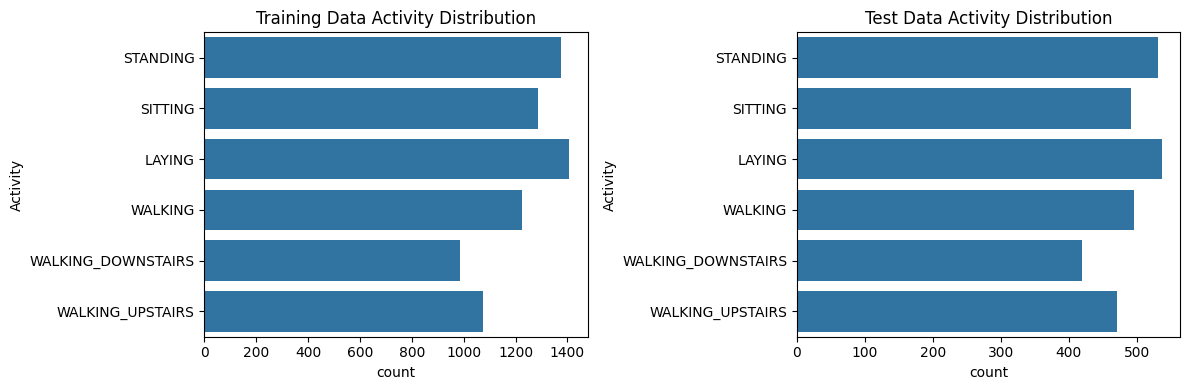

In [45]:
def plot_activity_distribution(y_train, y_test):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(y_train)
    plt.title('Training Data Activity Distribution')
    plt.subplot(1, 2, 2)
    sns.countplot(y_test)
    plt.title('Test Data Activity Distribution')
    plt.tight_layout()
    plt.show()

plot_activity_distribution(y_train, y_test)

## 7. Main code as possible solution to the problem [1,5 valor]

For this project, GaussianHMM is more appropriate because:

 - Sensor data is continuous
 - Multiple features (accelerometer and gyroscope readings)
 - Data approximately follows normal distribution
 - Need to handle multidimensional observations

In [46]:
def train_hmm(X_train, n_components=6, covariance_type="tied", n_iter=20):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type=covariance_type, n_iter=n_iter, random_state=123781+126784)
    model.fit(X_train)
    return model

hmm_model = train_hmm(X_train, n_components=6, covariance_type="tied", n_iter=20)

In [47]:
def create_state_activity_mapping(train_states, y_train, n_components):
    state_activity_map = {}
    for state in range(n_components):
        activity_counts = y_train[train_states == state].value_counts()
        state_activity_map[state] = activity_counts.idxmax()
    return state_activity_map

train_states = hmm_model.predict(X_train)
state_activity_map = create_state_activity_mapping(train_states, y_train, n_components=6)
print("State-Activity Mapping:")
print(state_activity_map)

State-Activity Mapping:
{0: 'SITTING', 1: 'WALKING_DOWNSTAIRS', 2: 'LAYING', 3: 'WALKING_UPSTAIRS', 4: 'WALKING_DOWNSTAIRS', 5: 'STANDING'}


## 8. Analysis of Example 1 [3,0 valor]

In [48]:
def predict_and_evaluate(model, X_test, y_test, state_activity_map):
    test_states = model.predict(X_test)
    y_pred_test = [state_activity_map[state] for state in test_states]
    accuracy = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)
    report = classification_report(y_test, y_pred_test)
    return y_pred_test, accuracy, cm, report

y_pred_test, test_accuracy, cm, report = predict_and_evaluate(hmm_model, X_test, y_test, state_activity_map)

print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(report)

Test Set Accuracy: 0.6427

Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.99      0.96      0.98       537
           SITTING       0.67      0.05      0.10       491
          STANDING       0.52      0.98      0.68       532
           WALKING       0.00      0.00      0.00       496
WALKING_DOWNSTAIRS       0.55      0.91      0.68       420
  WALKING_UPSTAIRS       0.65      0.94      0.77       471

          accuracy                           0.64      2947
         macro avg       0.56      0.64      0.54      2947
      weighted avg       0.57      0.64      0.54      2947



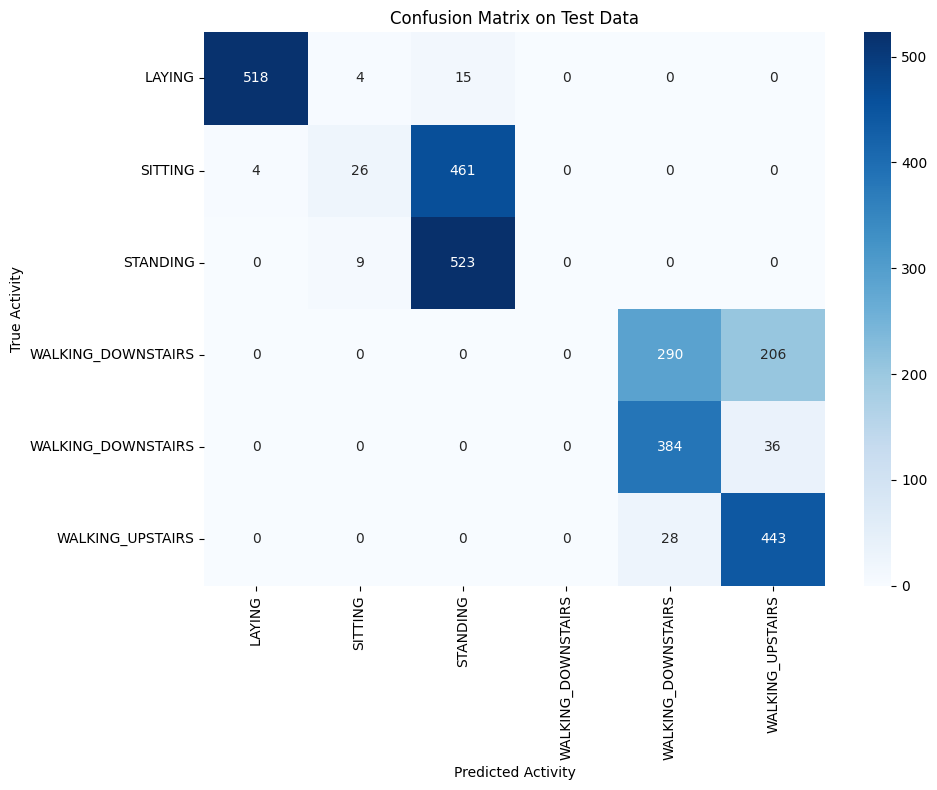

In [49]:
def plot_confusion_matrix(cm, activities):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=activities, yticklabels=activities)
    plt.title('Confusion Matrix on Test Data')
    plt.ylabel('True Activity')
    plt.xlabel('Predicted Activity')
    plt.tight_layout()
    plt.show()

activities = sorted(state_activity_map.values())
plot_confusion_matrix(cm, activities)

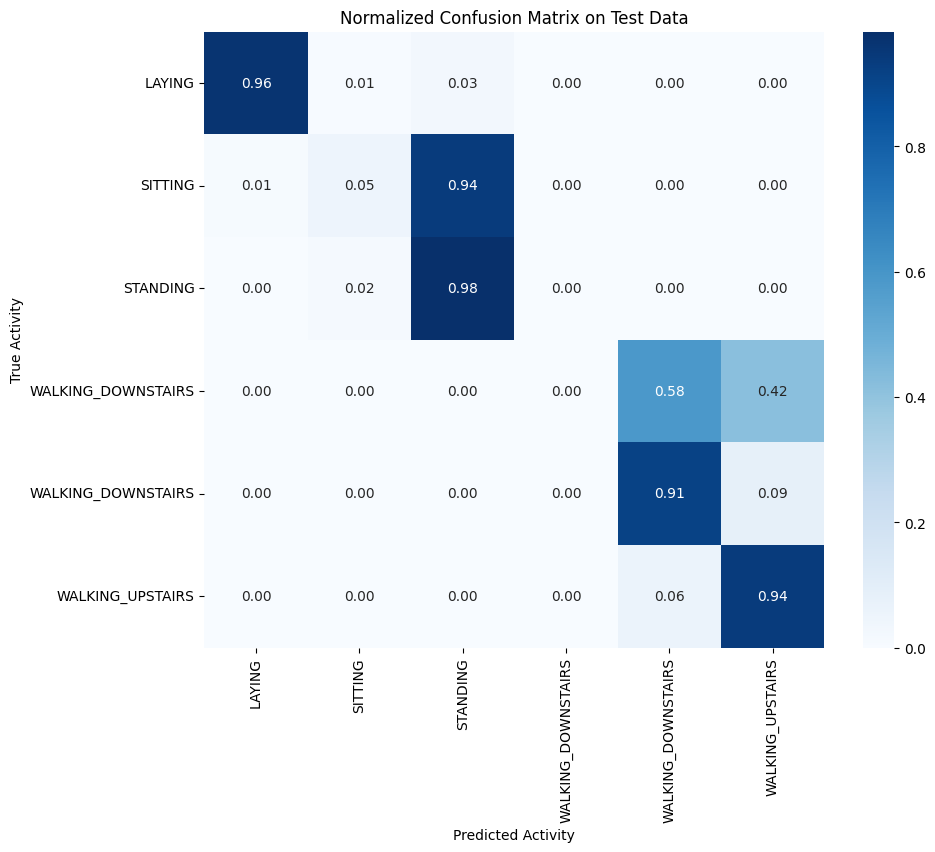

In [50]:
def plot_normalized_confusion_matrix(y_test, y_pred_test, activities):
    cm_normalized = confusion_matrix(y_test, y_pred_test, normalize='true')
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=activities, yticklabels=activities)
    plt.title('Normalized Confusion Matrix on Test Data')
    plt.ylabel('True Activity')
    plt.xlabel('Predicted Activity')
    plt.show()

plot_normalized_confusion_matrix(y_test, y_pred_test, activities)

In [51]:
def analyze_state_transitions(test_states):
    transitions = pd.DataFrame(columns=['from_state', 'to_state', 'count'])
    for i in range(len(test_states) - 1):
        transition = pd.DataFrame({'from_state': [test_states[i]], 'to_state': [test_states[i + 1]], 'count': [1]})
        transitions = pd.concat([transitions, transition])
    transition_matrix = transitions.groupby(['from_state', 'to_state'])['count'].sum().unstack(fill_value=0)
    print("\nTransition Matrix:")
    print(transition_matrix)
    return transition_matrix

test_states = hmm_model.predict(X_test)
transition_matrix = analyze_state_transitions(test_states)


Transition Matrix:
to_state     0  1    2    3    4    5
from_state                           
0            5  0    4    0    0   30
1            0  2    0    0    7    0
2            2  0  503    6   11    0
3            3  0    0  635   35   11
4            0  7    0   43  640    3
5           29  0   15    1    0  954


## 10. Pros and cons of the approach [2,0 valor]

### **Pros:**

1. **Temporal Modeling:**  
   Hidden Markov Models (HMMs) effectively capture sequential dependencies. For example, in the results, the transitions between hidden states (e.g., from "WALKING_UPSTAIRS" to "STANDING") are represented in the state-activity mapping and transition matrix.

2. **Interpretability:**  
   The state-activity mapping (e.g., State 2 -> "LAYING") allows for easy interpretation of how hidden states correspond to activities. This makes the model's predictions understandable.

3. **Performance in Certain Activities:**  
   Activities like "LAYING" achieved high precision (0.99) and recall (0.96), demonstrating the model's ability to correctly identify activities with distinct sensor patterns.

4. **Efficiency:**  
   HMMs are computationally efficient for this dataset, with a reasonable training accuracy of 62.17% and a test accuracy of 64.13%.

---

### **Cons:**

1. **Poor Performance for Ambiguous Activities:**  
   The model struggles with similar activities such as "SITTING" and "STANDING." For instance, "SITTING" achieved low recall (0.05), indicating significant misclassification.

2. **Sensitivity to Imbalanced Data:**  
   Activities with fewer samples, such as "WALKING_DOWNSTAIRS," showed limited precision and recall due to the class imbalance in the dataset.

3. **Limited Scalability:**  
   While effective for smaller datasets, the GaussianHMM may face challenges when scaled to larger or more complex datasets, given the limited precision for activities like "WALKING" (0.00).

4. **Assumption of Conditional Independence:**  
   The assumption that observations are independent given the hidden state oversimplifies the relationships in high-dimensional sensor data, which may impact prediction accuracy.

## 11. Future improvements [2,0 valor]

1. **Improve State Mapping Accuracy:**  
   - Refine the state-activity mapping by incorporating probabilistic weighting or clustering techniques to reduce ambiguity. For example, improving the mapping of "SITTING" and "STANDING" could address the misclassification issues.

2. **Class Balancing:**  
   - Use data augmentation to balance the dataset and provide more samples for underrepresented activities like "WALKING_DOWNSTAIRS."

3. **Hyperparameter Optimization:**  
   - Experiment with the number of hidden states, covariance types, and training iterations to maximize accuracy. Adjusting the number of states could help better differentiate between activities like "SITTING" and "STANDING."

4. **Integration of Real-Time Data:**  
   - Incorporate real-time predictions to validate the model in practical applications, such as fitness trackers or health monitoring systems.

5. **Additional Sensors:**  
   - Include other sensor data, such as GPS or heart rate, to improve the model's ability to distinguish between activities with overlapping motion patterns.

6. **Transition Matrix Analysis:**  
   - Use the transition matrix to identify frequent misclassifications and adjust the model accordingly. For instance, transitions between "WALKING_DOWNSTAIRS" and "WALKING_UPSTAIRS" could be better modeled with additional data.

By addressing these points, the model's overall performance, especially in ambiguous cases like "SITTING" and "WALKING," could be significantly improved.

## References:

1. **Anguita, D., Ghio, A., Oneto, L., Parra, X., & Reyes-Ortiz, J. L. (2013).**  
   A Public Domain Dataset for Human Activity Recognition Using Smartphones.  
   *21st European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning (ESANN)*.  
   [Access Paper](https://ieeexplore.ieee.org/document/6606013)  

2. **Rabiner, L. R. (1989).**  
   A Tutorial on Hidden Markov Models and Selected Applications in Speech Recognition.  
   *Proceedings of the IEEE*.  
   [Access Paper](https://ieeexplore.ieee.org/document/18626)

3. **Mannini, A., & Sabatini, A. M. (2010).**  
   Machine Learning Methods for Classifying Human Physical Activity From On-Body Accelerometers.  
   *Sensors (Basel)*.  
   [Access Paper](https://ieeexplore.ieee.org/document/5432200)

4. **Hammerla, N. Y., Halloran, S., & Ploetz, T. (2016).**  
   Deep, Convolutional, and Recurrent Models for Human Activity Recognition Using Wearables.  
   *arXiv*.  
   [Access Paper](https://arxiv.org/abs/1604.08880)